<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            encoding="latin-1"
                            )

In [614]:
prayer_df.sample(5)

,Ref,En,He
652,Tzidkat HaTzadick 209:1,NaN,â[×¨×] ××¢×ª ××ª×¤×× ××××ª×¨ ×××××× ××ª ××××¨×× ×××× ×××× ×¢××× ...
987,Berakhot 31b:6-8,"Incidental to this discussion of Hannahâs prayer, the Gemara explores related topics. In her p...","×´×Ö·×ªÖ¼Ö´×Ö¼Ö¹×¨ × Ö¶×Ö¶×¨ ×Ö·×ªÖ¼Ö¹××Ö·×¨ ××³ ×¦Ö°×Ö¸××Ö¹×ª×´, ×Ö¸×Ö·×¨ ×¨Ö·×Ö¼Ö..."
586,"Rabbeinu Bahya, Bamidbar 16:22:3-4",The third element in âfalling on oneâs faceâ during prayers of entreaties is the utter den...,"××©×××©××ª , ×××¨×××ª ××¡××¨×ª ×××©×× ××××× ××¨××©××ª××, ×××× ×× ×..."
796,Midrash Tehillim 5:4,NaN,××× ×¦× ×× ×× ×××××ª. ×××¨ ×¨' ×©×××× ××¨ × ××× × ×¢× ×©× × × ×××××ª ×...
145,"Midrash Tanchuma, Vayera 1:6","The Holy One, blessed be He, said to Israel: Be meticulous in the matter of prayer, for no virtu...","×Ö¸×Ö·×¨ ×Ö¸×Ö¶× ×Ö·×§Ö¼Ö¸××Ö¹×©× ×Ö¼Ö¸×¨×Ö¼×Ö° ××Ö¼× ×Ö°×Ö´×©×Ö°×¨Ö¸×Öµ×, ×..."


In [615]:
not_prayer_df.sample(5)

,Ref,En,He,Topics
982,"Mishneh Torah, Damages to Property 3:6",NaN,×Ö¼Ö°×Öµ×Ö¸× ×©×Ö¶×Ö¸×Ö°×Ö¸× ×Ö³×Ö¸×Ö´×× ×©×Ö¶×Öµ×× ×Ö¼Ö·×¨Ö°×Ö¼Ö¸×Ö¼ ×Ö°×...,laws-of-damages-from-animals
681,Zohar 2:237b:2,NaN,"×Ö¼×Ö°×Ö´×× ×Ö¼Ö·×Ö°, ×Ö¼Ö¸× ×Ö´×× Ö¼×Ö¼× ×Ö¼Ö°×Ö´×©×Ö°×ªÖ¼Ö·×Ö¼Ö°×Öµ× ×Ö¼Ö¸...",cecum
742,Bava Kamma 46b:3,The Gemara now explains the logic of Rav and Shmuel: Rav says that this is a case of a mistaken ...,×¨× ×××¨ ××¨× ×× ××§× ××¢××ª ××× ××ª×¨ ×¨××× ××¨××× ×××× ×©× ××¨×××...,laws-of-cancellation-of-a-transaction-and-the-sellers-responsibility|laws-of-judges-and-courts
53,Bekhorot 31b:1,GEMARA: The mishna teaches that with regard to all disqualified consecrated animals that were di...,×××³ ×× ×¤×¡××× ××××§××©×× ×× ××ª× ×××§××© ××××ª ×××××× ××××¨ ×¤×...,animal-tithes|laws-of-animal-firstlings
707,Eruvin 50b:15,The Gemara poses a question: Let us say that this baraita is a conclusive refutation of the opin...,×××× ×ª×××× ×ª××××ª×× ××¨× ×¨× ×ª× × ××× ××¤×××:,dinei-eruv-techumin


In [616]:
prayer_df['topic'] = 'prayer'
prayer_df = prayer_df[['En','topic']]
prayer_df.tail(3)

,En,topic
1049,"It is true that you are the one who judges, and reproves, who knows all, and bears witness, who ...",prayer
1050,"In these Berachot (blessings) we bow down: the first Beracha (blessing) [of Shemoneh Esreh], in ...",prayer
1051,On seeds he says [the Beracha (blessing)] Borei Minei Zerayim (Who created different types of se...,prayer


In [617]:
prayer_df.shape

(1052, 2)

In [618]:
not_prayer_df['topic'] = 'not_prayer'
not_prayer_df = not_prayer_df[['En','topic']]
not_prayer_df.tail(3)

,En,topic
1048,"×× ×ª××§×©× ××××× ×××, do not search them out as they would confer spiritual contami...",not_prayer
1049,who said to another: I am hereby selling to you all of the property that I own of the house of b...,not_prayer
1050,NaN,not_prayer


In [619]:
not_prayer_df.shape

(1051, 2)

In [620]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)
del all_prayer_df['index']

all_prayer_df.sample(5)
all_prayer_df.loc[[345]]


,En,topic
345,"×××¦×¢×§ ××©× ×× ×' ×¢× ×××¨ ××¦×¤×¨××¢×× ××©×¨ ×©× ××¤×¨×¢×, Moses prayed tha...",prayer


In [621]:
all_prayer_df = all_prayer_df.apply(lambda x: x.astype(str).str.lower())
all_prayer_df.sample(5)

,En,topic
1503,"to he who is despised of men, to he who is abhorred of nations, to a servant of rulers: kings sh...",not_prayer
1353,nan,not_prayer
1082,nan,not_prayer
1160,"the sages taught in a baraita : on the first pilgrimage festival after finding the lost item, th...",not_prayer
2003,rav sheizvi said in the name of rabbi elazar ben azarya: what is the meaning of that which is wr...,not_prayer


In [622]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(2103, 2)
(1223, 2)


In [623]:
all_prayer_df.dropna(inplace=True)
all_prayer_df.sample(5)

,En,topic
115,"â§ the gemara relates: in the years of rav yosef there was a divine anger, manifested by world h...",prayer
903,take not thy handmaid for a worthless woman: for out of the greatness of my complaint and grief ...,prayer
1367,"the fall of the angels ""a nd adam lived an hundred and thirty years, and he begat in his own lik...",not_prayer
683,â§ the question of whether or not an individualâs sentence can be rescinded is a dispute betwe...,prayer
1866,gemara: the sages taught in a baraita : there was an incident involving rabbi simai and rabbi tz...,not_prayer


In [624]:
all_prayer_df.isnull().sum()

En       0
topic    0
dtype: int64

In [625]:
all_prayer_df.sample(5)

,En,topic
64,"""and they were exceedingly afraid, etc."": whereupon they ""embraced the trade"" (prayer) of their ...",prayer
391,and it was that before he had finished speaking etc. (bereishis 24:15). rabbi shimon bar yochai ...,prayer
2013,abaye said to rav dimi: what is the formula of one blessing abridged from the three blessings of...,not_prayer
6,"that was also taught in a baraita : one should neither stand upon a chair nor upon a stool, nor ...",prayer
1582,"trait number three of the four traits described in ethics chapter one, is the unseemliness of pu...",not_prayer


In [0]:
all_prayer_df['topic'] = all_prayer_df['topic'].map({'not_prayer': 0, 'prayer': 1})

In [627]:
all_prayer_df.sample(5)
all_prayer_df.loc[[91]]


,En,topic
91,"therefore pray not thou for this people, neither lift up cry nor prayer for them, neither make i...",1


In [628]:
nltk.download('stopwords')

import nltk
import string

from nltk.corpus import stopwords

whitelist = set('abcdefghijklmnopqrstuvwxyz ')

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return str of clean text words
    '''
    #1
    chars_str = ''.join(filter(whitelist.__contains__, text))
    #2
    clean_words = [word for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    #3
    return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [629]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'c une gns ac pien p'

In [630]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(process_text)
all_prayer_df.head()
all_prayer_df.loc[[345]]


,En,topic
345,moses prayed gd remove crocodiles sent pharaoh people whereas others remain river required speci...,1


In [631]:
# all_prayer_df[id.loc==91]
all_prayer_df.loc[[91]]


,En,topic
91,therefore pray thou people neither lift cry prayer neither make intercession hear thee,1


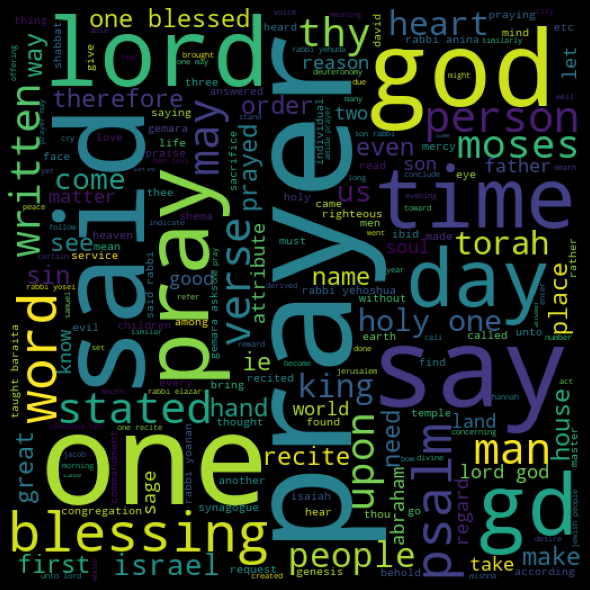

In [632]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

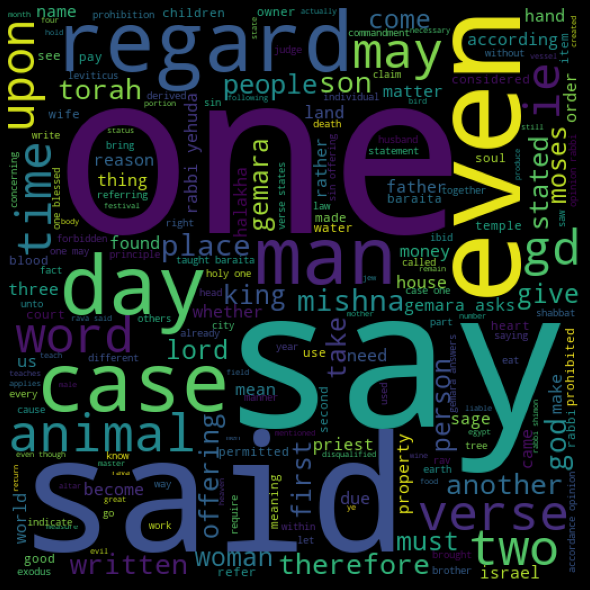

In [633]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['topic'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [634]:
X = all_prayer_df.En
y = all_prayer_df.topic
print(X.shape)
print(y.shape)

(1223,)
(1223,)


In [635]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(917,)
(306,)
(917,)
(306,)


In [636]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)
# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])

<917x177725 sparse matrix of type '<class 'numpy.float64'>'
	with 201287 stored elements in Compressed Sparse Row format>

In [637]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm


<306x177725 sparse matrix of type '<class 'numpy.float64'>'
	with 8514 stored elements in Compressed Sparse Row format>

In [638]:


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)

# classifier.fit(X_train, y_train)


CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 12.9 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [639]:
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7973856209150327

In [640]:
print(y_test.value_counts())
# print(y_test.value_counts()[0])


0    165
1    141
Name: topic, dtype: int64


In [641]:
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)


Null accuracy: 0    0.539216
Name: topic, dtype: float64


In [642]:
negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))


Manual null accuracy: 0.46078431372549017


In [643]:
metrics.confusion_matrix(y_test, y_pred_class)


array([[148,  17],
       [ 45,  96]])

In [0]:
TP = X_test[y_pred + y_test == 2]
TN = X_test[y_pred + y_test == 0]
FP = X_test[y_pred > y_test]
FN = X_test[y_pred < y_test]

In [0]:
pd.options.display.max_colwidth = 100

In [647]:
print("\n*** TP ***")
print(TP.sample(5))
print("\n*** TN ***")
print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(5))
print("\n*** FN ***")
print(FN.sample(5))


*** TP ***
826     god remembered divine name really signifies god strict justice transformed divine mercy prayers ...
1026    congregational prayer always heard almighty even sinners among holy one blessed reject prayer mu...
1017    ie interpret verse cover deuteronomy gemara answers rabbis require taught baraita phrase four co...
138     person stand top bed top chair top bench top high place pray shmoneh esreh high places front god...
819     tabernacle shalem dwelling place zion r brachia said beginning creation world holy one made tabe...
Name: En, dtype: object

*** TN ***
1625    mishna taught temple destroyed second time also ninth av gemara asks derive second temple destro...
1840    gemara clarifies torah refers owner working borrower understood referring time borrowing time mi...
1713    lest become take targum lest become unclean unfit use anything man repugnance come contact accou...
1441    baraita continues punishment nonpriest performed temple service death hand heave